In [5]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
# Define the graph as a dictionary
# Each edge has a "cost" (e.g., time or reliability)
graph = {
    0: {1: 2, 2: 2},
    1: {2: 1, 3: 4},
    2: {3: 1},
    3: {}
}

In [7]:
# Parameters for ACO
num_ants = 5
num_iterations = 100
alpha = 1  # Importance of pheromone
beta = 2   # Importance of edge cost
rho = 0.5  # Pheromone evaporation rate
pheromone_initial = 1.0

In [8]:
# Initialize pheromones
pheromones = {(node, neighbor): pheromone_initial for node in graph for neighbor in graph[node]}


In [9]:
# Helper function to calculate probabilities for an ant's next move
def calculate_probabilities(current_node, unvisited, pheromones, graph, alpha, beta):
    probabilities = []
    for next_node in unvisited:
        edge = (current_node, next_node)
        pheromone = pheromones[edge] ** alpha
        cost = graph[current_node][next_node]
        heuristic = (1 / cost) ** beta
        probabilities.append(pheromone * heuristic)
    total = sum(probabilities)
    return [p / total for p in probabilities]

In [10]:
# Function to simulate one ant's journey
def simulate_ant(start, end, graph, pheromones, alpha, beta):
    current_node = start
    path = [current_node]
    unvisited = set(graph.keys())
    unvisited.remove(current_node)
    total_cost = 0

    while current_node != end:
        unvisited_neighbors = [n for n in graph[current_node] if n in unvisited]
        if not unvisited_neighbors:
            return None, float('inf')  # No path found

        probabilities = calculate_probabilities(current_node, unvisited_neighbors, pheromones, graph, alpha, beta)
        next_node = random.choices(unvisited_neighbors, probabilities)[0]

        path.append(next_node)
        total_cost += graph[current_node][next_node]
        current_node = next_node
        unvisited.remove(current_node)

    return path, total_cost

In [11]:
# Update pheromones based on ants' paths
def update_pheromones(paths, pheromones, rho):
    # Evaporate pheromones
    for edge in pheromones:
        pheromones[edge] *= (1 - rho)
# Add pheromones based on paths
    for path, cost in paths:
        for i in range(len(path) - 1):
            edge = (path[i], path[i + 1])
            pheromones[edge] += 1 / cost

In [12]:
# ACO main function
def ant_colony_optimization(start, end, graph, num_ants, num_iterations, alpha, beta, rho):
    best_path = None
    best_cost = float('inf')

    for _ in range(num_iterations):
        paths = []

        for _ in range(num_ants):
            path, cost = simulate_ant(start, end, graph, pheromones, alpha, beta)
            if path:
                paths.append((path, cost))
                if cost < best_cost:
                    best_path, best_cost = path, cost

        update_pheromones(paths, pheromones, rho)

    return best_path, best_cost

In [13]:
# Run the ACO algorithm
start_node = 0
end_node = 3
best_path, best_cost = ant_colony_optimization(start_node, end_node, graph, num_ants, num_iterations, alpha, beta, rho)

print("Best Path:", best_path)
print("Best Cost:", best_cost)

Best Path: [0, 2, 3]
Best Cost: 3


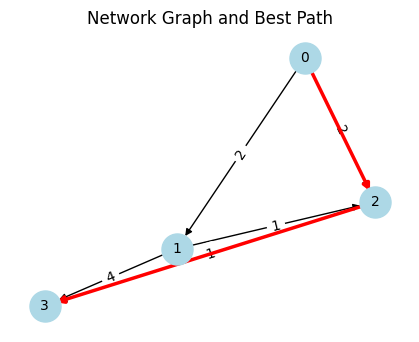

In [15]:
# Visualization Function
def visualize_graph(graph, best_path=None):
    G = nx.DiGraph()

    # Add edges and their weights
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Layout for positioning nodes
    plt.figure(figsize=(4, 3))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the best path
    if best_path:
        path_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title("Network Graph and Best Path")
    plt.show()

# Visualize the graph and best path
visualize_graph(graph, best_path)